## 3. Autoencoders (AEs) en MNIST
Como se ha discutido en clases, las RBM’s y posteriormente los AE’s (redes no supervisadas) fueron un componente crucial en el desarrollo de los modelos que entre 2006 y 2010 vigorizaron el área de las redes neuronales artificiales con logros notables de desempeño en diferentes tareas de aprendizaje automático. En esta sección aprenderemos a utilizar el más sencillo de estos modelos: un autoencoder o AE. Consideraremos tres aplicaciones clásicas: reducción de dimensionalidad, denoising y pre-entrenamiento. Con este objetivo en mente, utilizaremos un dataset denominado MNIST. Se trata de una colección de 70000 imágenes de 28 $\times$ 28 pixeles correspondientes a dígitos manuscritos (números entre 0 y 9). En su versión tradicional, la colección se encuentra separada en dos subconjuntos: uno de entrenamiento de 60000 imágenes y otro de test de 10000 imágenes. La tarea consiste en construir un programa para que aprenda a identificar correctamente el dı́gito representado en la imagen

> a) Escriba una función que cargue los datos desde el repositorio de keras, normalice las imágenes de modo que los pixeles queden en [0, 1], transforme las imágenes en vectores ($\in {\rm I\!R}^{784}$) y devuelva tres subconjuntos disjuntos: uno de entrenamiento, uno de validación y uno de pruebas. Construya el conjunto de validación utilizando los últimos $nval = 5000$ casos del conjunto del entrenamiento. El conjunto de entrenamiento consistirá en las primeras $60000 - nval$ imágenes.

Primero importamos las librerías necesarias para la experimentación.

In [30]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt

from keras import backend
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Input, Dense
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, load_model
from keras.optimizers import SGD
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from numpy.random import binomial

Cargamos los datos del MNIST handwritten digit database.

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255. #and x_test
x_test = x_test.astype('float32') / 255.

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
print("x_train size: {}".format(x_train.shape))
print("x_test size: {}".format(x_test.shape))
print("Y_train size: {}".format(Y_train.shape))
print("Y_test size: {}".format(Y_test.shape))

x_train size: (60000, 28, 28)
x_test size: (10000, 28, 28)
Y_train size: (60000, 10)
Y_test size: (10000, 10)


De los 70.000 datos 60.000 serán utilizados para el entrenamiento (considerando los datos de evaluación) y 10.000 se ocuparán para el testing.

El conjunto de validación no se extraerá directamente de los datos, sino que mediante el parámetro *validation_split* que toma un valor en [0,1]. Este es el porcentaje de datos de entrenamiento que toma para realizar la validación. Como se utilizarán 5000 datos de validación el parametro a entregar será $val\_ratio= 5000/60000$.

In [15]:
val_ratio = 5000/60000
print("Porcertanje de datos para validación: %.4f" % val_ratio)

Porcertanje de datos para validación: 0.0833


Un ejemplo del dataset se visualiza a continuación. Los datos vienen en forma de matriz con dimensiones $28\times28$.

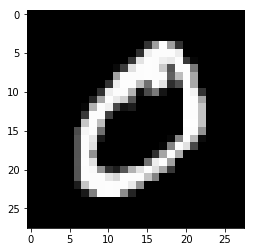

In [5]:
plt.imshow(x_train[1], cmap='gray')
plt.show()


### 3.1 Reducción de dimensionalidad
Para esta primera sección se trabajará con un autoencoder tradicional (*feed forward*) en donde las capas de este son densas. Para esto se re estructuraran los datos de entradas en forma de vector, es decir la matriz de 28 $\times$ 28 pasa a ser un vector de 784 componentes.

In [6]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print("x_train size: {}".format(x_train.shape))
print("x_test size: {}".format(x_test.shape))

x_train size: (60000, 784)
x_test size: (10000, 784)


En vez de trabajar con matrices se trabajará con vectores.

Una de las aplicaciones tı́picas de un AE es reducción de dimensionalidad, es decir, implementar una transformación $\phi:{\rm I\!R}^d \leftarrow {\rm I\!R}^{d'}$ de objetos representados originalmente por $d$ atributos en una nueva representación de $d'$ atributos, de modo tal que se preserve lo mejor posible la “información” original. Obtener tal representación es útil desde un punto de vista computacional (compresión) y estadı́stico (permite construir modelos con un menor número de parámetros libres). Un AE es una técnica de reducción de dimensionalidad no supervisada porque no hace uso de información acerca de las clases a las que pertenecen los datos de entrenamiento

> a) Entrene un AE básico (1 capa escondida) para generar una representación de MNIST en $d'$= 2, 8, 32, 64 dimensiones. Justifique la elección de la función de pérdida a utilizar y del criterio de entrenamiento en general. Determine el porcentaje de compresión obtenido y el error de reconstrucción en cada caso. ¿Mejora el resultado si elegimos una función de activación **ReLU** para el Encoder? ¿Podrı́a utilizarse esta activación en el Decoder?

# explicar autoencoder
# explicar eleccion de mse

In [7]:
sigmoid_results = []
dims = [2, 8, 32, 64]
for dim in dims:
    start_time = time.time()
    input_img = Input(shape=(784,))
    encoded = Dense(dim, activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

    autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error', metrics=['accuracy'])
    hist = autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_split=val_ratio,verbose=0)
    duration = time.time() - start_time
    sigmoid_results.append(hist.history)
    autoencoder.save('ae_p2/basic_ae_sigmoid_768x'+str(dim)+'.h5')
    print("Tiempo total AE sigmoid dim={} t={}s".format(dim, duration))

/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':
/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


Tiempo total AE sigmoid dim=2 t=146.08135771751404s
Tiempo total AE sigmoid dim=8 t=154.39099717140198s
Tiempo total AE sigmoid dim=32 t=161.80759501457214s
Tiempo total AE sigmoid dim=64 t=168.56948137283325s


En término de tiempo de ejecución, a mayor dimensionalidad mayor fue el tiempo de ejecución. No obtante anteriormente se ejecutó el mismo bloque de código y los tiempo no fueron crecientes.

Se grafican los resultados de accuracy y loss para entrenamiento y testing.

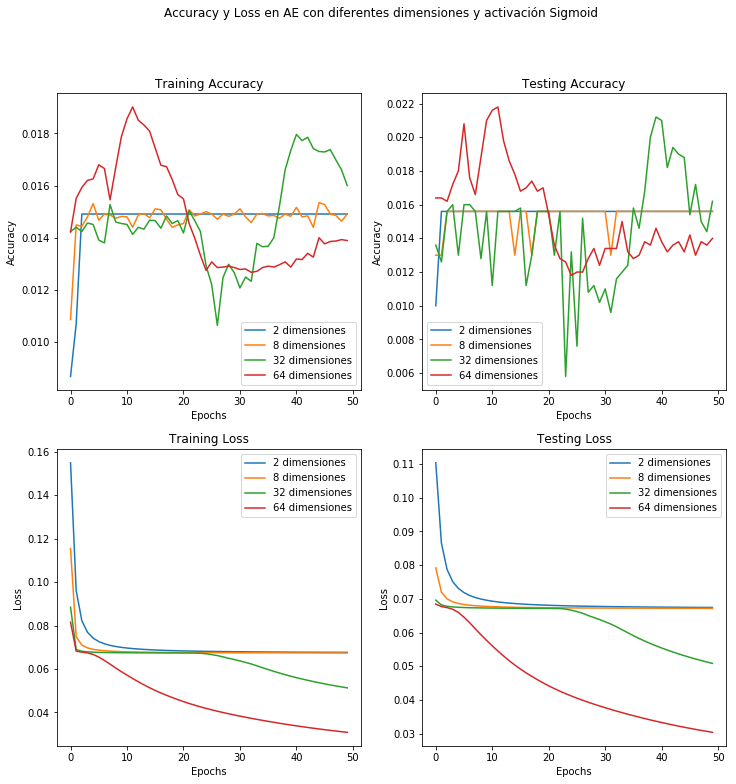

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,12))
ax = axes.flatten()
for i,dim in enumerate(dims):
    ax[0].plot(sigmoid_results[i]["acc"], label=str(dim)+" dimensiones")
    ax[1].plot(sigmoid_results[i]["val_acc"], label=str(dim)+" dimensiones")
    ax[2].plot(sigmoid_results[i]["loss"], label=str(dim)+" dimensiones")
    ax[3].plot(sigmoid_results[i]["val_loss"], label=str(dim)+" dimensiones")
    
ax[0].set_title('Training Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend()
ax[1].set_title('Testing Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].legend()
ax[2].set_title('Training Loss')
ax[2].set_ylabel('Loss')
ax[2].set_xlabel('Epochs')
ax[2].legend()
ax[3].set_title('Testing Loss')
ax[3].set_ylabel('Loss')
ax[3].set_xlabel('Epochs')
ax[3].legend()
plt.suptitle("Accuracy y Loss en AE con diferentes dimensiones y activación Sigmoid")
plt.show()

Los gráficos de accuracy tienen una fluctuación en los valores a medida que aumentan los epochs. Para las dos primeras dimensiones se llega a un estado constante a los pocos epochs. Para las dos siguiente funciones dim=64 parte siendo muy buena pero a los 20 epochs baja la accuracy siendo la peor de las 4. Para dim=32 sucede lo contrario.

En el caso de la función de pérdida se tiene un mejor resultado de reconstrucción con dimensión=64 estando muy por debajo del resto. Para dim=2 y dim=8 se repite el comportamiento de quedar constante a las pocas iteraciones sobre los datos de entrenamiento.

Ahora probaremos con el mismo AR pero con función relu, esperando tener resultados diferentes.

In [9]:
relu_results = []

for dim in dims:
    start_time = time.time()
    input_img = Input(shape=(784,))
    encoded = Dense(dim, activation='relu')(input_img)
    decoded = Dense(784, activation='relu')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

    autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error', metrics=['accuracy'])
    hist = autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_split=val_ratio,verbose=0)
    duration = time.time() - start_time
    relu_results.append(hist.history)
    autoencoder.save('ae_p2/basic_ae_relu_768x'+str(dim)+'.h5')
    print("Tiempo total AE relu dim={} t={}s".format(dim, duration))

/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':
/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


Tiempo total AE relu dim=2 t=147.75272822380066s
Tiempo total AE relu dim=8 t=150.7963261604309s
Tiempo total AE relu dim=32 t=167.0249800682068s
Tiempo total AE relu dim=64 t=192.97245073318481s


El uso de Relu hizo que aumentarán los tiempos de entrenamiento. En este caso se dio que al aumentar la dimensión aumentó el tiempo.

Graficamos los resultados de los AE.

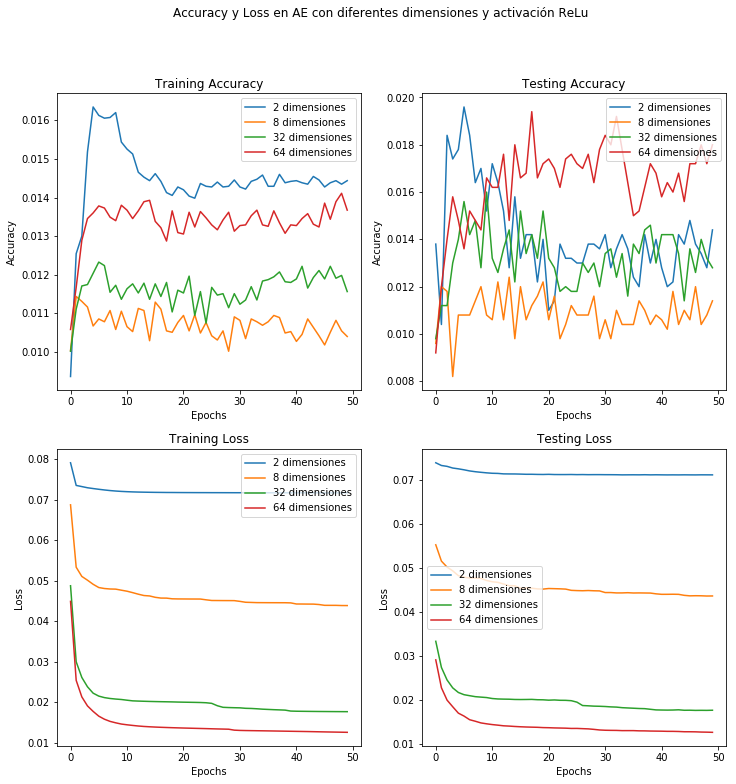

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,12))
ax = axes.flatten()
for i,dim in enumerate(dims):
    ax[0].plot(relu_results[i]["acc"], label=str(dim)+" dimensiones")
    ax[1].plot(relu_results[i]["val_acc"], label=str(dim)+" dimensiones")
    ax[2].plot(relu_results[i]["loss"], label=str(dim)+" dimensiones")
    ax[3].plot(relu_results[i]["val_loss"], label=str(dim)+" dimensiones")
    
ax[0].set_title('Training Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend()
ax[1].set_title('Testing Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].legend()
ax[2].set_title('Training Loss')
ax[2].set_ylabel('Loss')
ax[2].set_xlabel('Epochs')
ax[2].legend()
ax[3].set_title('Testing Loss')
ax[3].set_ylabel('Loss')
ax[3].set_xlabel('Epochs')
ax[3].legend()
plt.suptitle("Accuracy y Loss en AE con diferentes dimensiones y activación ReLu")
plt.show()

Utilizando ReLu en el entrenamiento se reduce la pérdida a medida que aumenta la dimensionalidad. Esto significa que las reconstrucciones serán mejores. No obstante la cercanía de los resultados para dim=32 y dim=64 darían a entender que para cierta dimensionalidad ya no comienza a mejorar con tal diferencia como pasa con dim=2 y dim=8.

Los gráficos de acurracy tienen una mayor fluctuación y no hay clara tendencia de los resultados.

Finalmente, Relu si sería una opción viable para el entrenamiento.

> b) Compare visualmente la reconstrucción que logra hacer el autoencoder desde la representación en ${\rm I\!R}^{d'}$ para algunas imágenes del conjunto de pruebas. Determine si la percepción visual se corresponde con el error de reconstrucción observada. Comente.

In [13]:
dims = [2, 8, 32, 64]
def show_results(dims, activation):
    for dim in dims:
        print("AE activación:{}\tdim:{}".format(activation,dim))
        autoencoder = load_model("./ae_p2/basic_ae_"+activation+"_768x"+str(dim)+".h5")
        inputs = autoencoder.input
        encoder_layer = autoencoder.layers[-2]
        encoder = Model(inputs=inputs, outputs=encoder_layer(inputs))
        decoded_shape = Input(shape=(dim,))
        decoder_layer = autoencoder.layers[-1] 
        decoder = Model(inputs=decoded_shape, outputs=decoder_layer(decoded_shape))
        
        encoded_test = encoder.predict(x_test)
        decoded_test = decoder.predict(encoded_test)
        print("error[Loss, Acc]:{}".format(autoencoder.evaluate(x_test,x_test)))

        n = 10
        plt.figure(figsize=(20, 4))
        for i in range(n):
            ax = plt.subplot(2, n, i + 1)
            plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax = plt.subplot(2, n, i + 1 + n)
            plt.imshow(decoded_test[i].reshape(28, 28),cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

AE activación:sigmoid	dim:2
10000/10000 [==============================] - 0s 50us/step
error[Loss, Acc]:[0.06784658191204071, 0.0161]


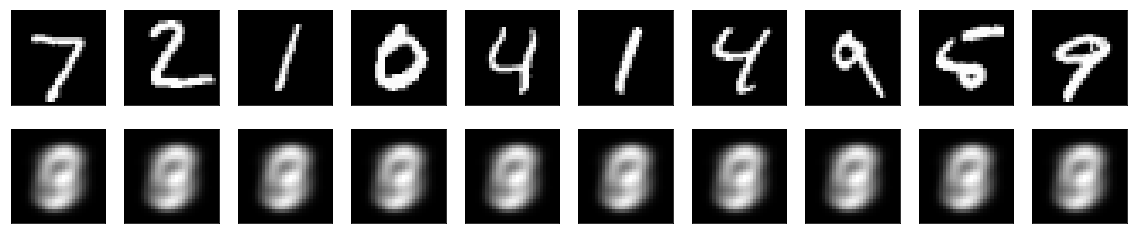

AE activación:sigmoid	dim:8
10000/10000 [==============================] - 0s 50us/step
error[Loss, Acc]:[0.06758099347352982, 0.0161]


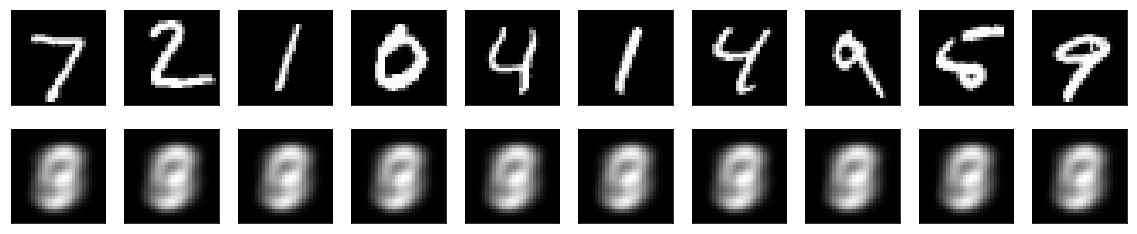

AE activación:sigmoid	dim:32
10000/10000 [==============================] - 1s 66us/step
error[Loss, Acc]:[0.05094187282323837, 0.0168]


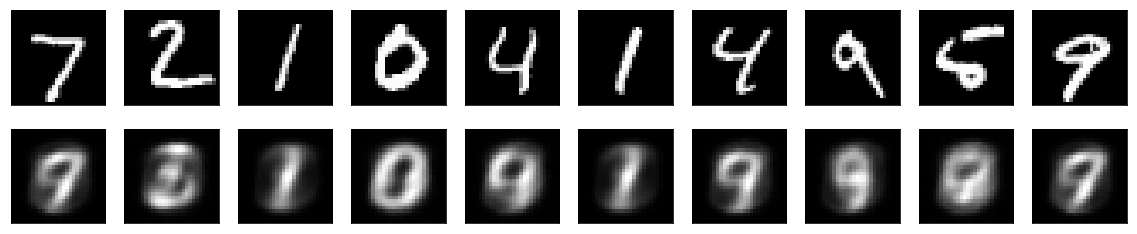

AE activación:sigmoid	dim:64
10000/10000 [==============================] - 0s 47us/step
error[Loss, Acc]:[0.030322149845957755, 0.0118]


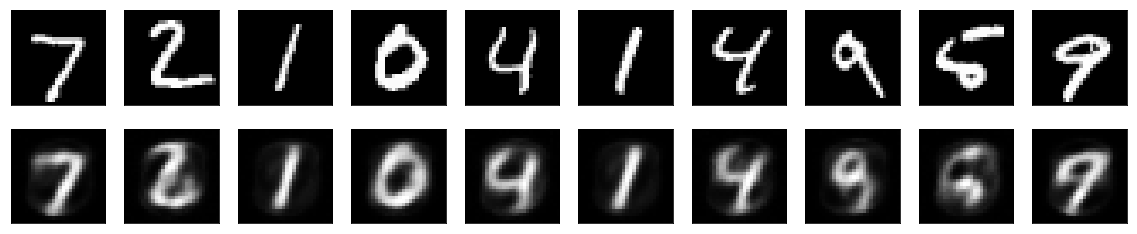

In [15]:
show_results(dims, 'sigmoid')

AE activación:relu	dim:2
10000/10000 [==============================] - 0s 46us/step
error[Loss, Acc]:[0.07193156352043152, 0.0146]


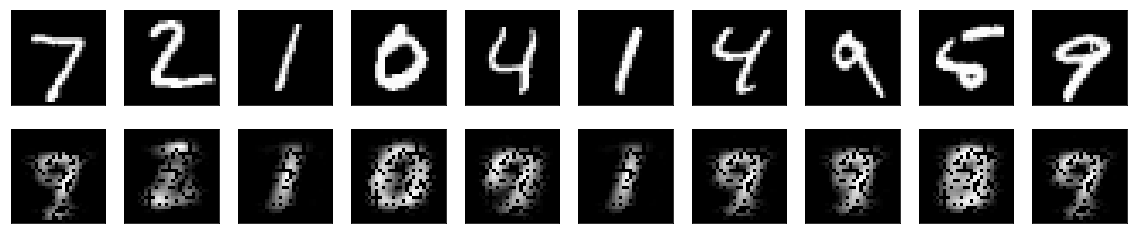

AE activación:relu	dim:8
10000/10000 [==============================] - 0s 45us/step
error[Loss, Acc]:[0.04371277124881744, 0.0125]


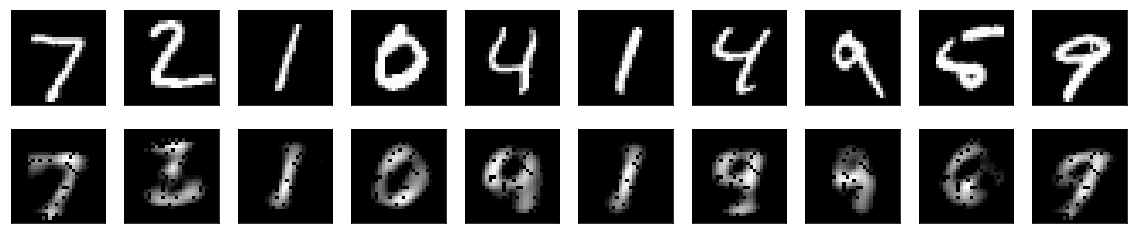

AE activación:relu	dim:32
10000/10000 [==============================] - 0s 46us/step
error[Loss, Acc]:[0.017569315341115, 0.0128]


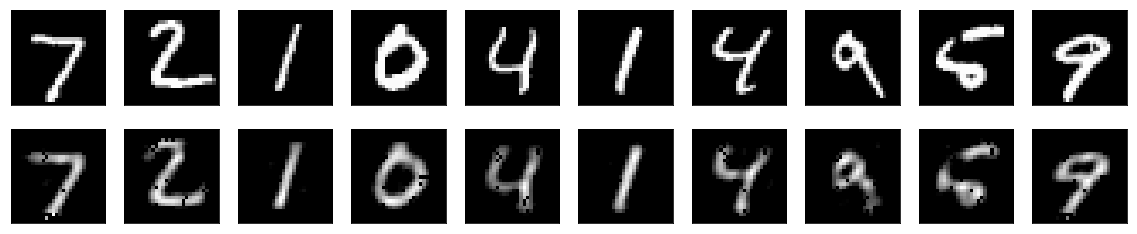

AE activación:relu	dim:64
10000/10000 [==============================] - 1s 60us/step
error[Loss, Acc]:[0.012379439428448677, 0.0119]


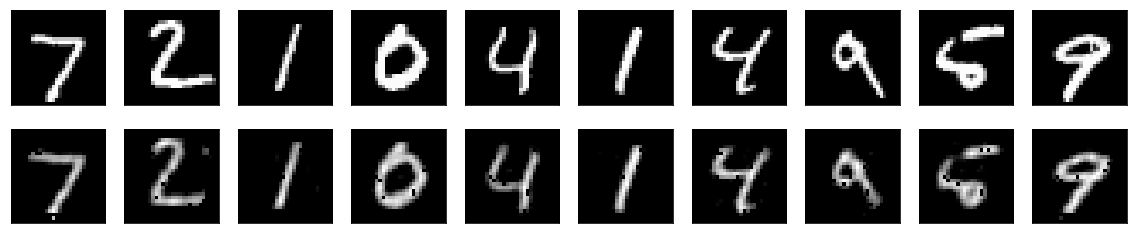

In [14]:
show_results(dims, 'relu')


> c) Para verificar la calidad de la representación obtenida, implemente el clasificador denominado $kNN$ (k-nearest neighbor): dada una imagen $x$, el clasificador busca las k = 10 imágenes de entrenamiento más similares (de acuerdo a una distancia, e.g. euclidiana) y predice como clase, la etiqueta más popular entre las imágenes cercanas. Mida el error de pruebas obtenido construyendo este clasificador sobre la data reducida a través del autocnder comparando con la representación reducida obtenida vía PCA (una técnica clásica de reducción de dimensionalidad) utilizando el mismo número de dimensiones $d'$= 2, 4, 8, 16, 32. Considere tanto el error de reconstrucción como el desempeño en clasificación , además de comparar los tiempos medios de predicción en ambos escenarios.

Primero se generarán los modelos para d = 4 y d = 16.

In [8]:
dims = [4, 16]
for dim in dims:
    start_time = time.time()
    input_img = Input(shape=(784,))
    encoded = Dense(dim, activation='relu')(input_img)
    decoded = Dense(784, activation='relu')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

    autoencoder.compile(optimizer=SGD(lr=1.0), loss='mean_squared_error', metrics=['accuracy'])
    autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_split=val_ratio,verbose=0)
    duration = time.time() - start_time
    autoencoder.save('ae_p2/basic_ae_relu_768x'+str(dim)+'.h5')
    print("Tiempo total AE relu dim={} t={}s".format(dim, duration))

/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys
/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


Tiempo total AE relu dim=4 t=177.13644981384277s
Tiempo total AE relu dim=16 t=167.42113280296326s


PCA (*Principal Component Analysis*) es una técnica de reducción de dimensionalidad que busca llevar elementos de dimensiones superiores a reducciones que contengan una mayor cantidad de información. Esta técnica es muy usada para el estudio y visualización de problemas en alta dimensionalidad, donde no es posible hacer gráficos de más de tres dimensiones.

Se buscará comparar el error de prueba de la reducción del AE comparándolo con la representación de PCA.

In [9]:
dims = [2,4,8,16,32,64]

for d in dims:
    print("Dimensión utilizada: %d" % d)
    #PCA
    pca = PCA(n_components=d)
    pca.fit(x_train)
    pca_train = pca.transform(x_train)
    pca_test = pca.transform(x_test)
    #AUTOENCODER
    encoder = load_model("./ae_p2/basic_ae_relu_768x"+str(d)+".h5")
    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)
    #CLASIFICATION
    start_time = time.time()
    clf = KNeighborsClassifier(10)
    clf.fit(pca_train, y_train)
    print("-Classification Accuracy PCA %.2f" % clf.score(pca_test,y_test))
    print("--Tiempo:{:.4f}".format(time.time()-start_time))
    start_time = time.time()
    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, y_train)
    print("-Classification Accuracy %.2f" % clf.score(encoded_test,y_test))
    print("--Tiempo:{:.4f}\n".format(time.time()-start_time))


Dimensión utilizada: 2
-Classification Accuracy PCA 0.44
--Tiempo:0.0953
-Classification Accuracy 0.44
--Tiempo:10.1700

Dimensión utilizada: 4
-Classification Accuracy PCA 0.65
--Tiempo:0.1684
-Classification Accuracy 0.67
--Tiempo:25.8425

Dimensión utilizada: 8
-Classification Accuracy PCA 0.90
--Tiempo:1.0271
-Classification Accuracy 0.90
--Tiempo:164.6648

Dimensión utilizada: 16
-Classification Accuracy PCA 0.96
--Tiempo:9.0891
-Classification Accuracy 0.96
--Tiempo:592.3389

Dimensión utilizada: 32
-Classification Accuracy PCA 0.97
--Tiempo:28.0290
-Classification Accuracy 0.97
--Tiempo:746.7902

Dimensión utilizada: 64
-Classification Accuracy PCA 0.97
--Tiempo:67.1742
-Classification Accuracy 0.97
--Tiempo:816.0628



En relación al tiempo, PCA demora mucho menos que con el AE. Mirando los resultados de accuracy las técnicas tienen resultados iguales excepto para dim=4 donde PCA está por 2% abajo del AE. Dado los resultados convendría utilizar PCA principalmente por el costo reducido en tiempo.

> d) Modifique el autoencoder básico construido en (a) para implementar un deep autoencoder (*deep AE*), es decir, un autoencoder con al menos dos capas ocultas. Demuestre experimentalmente que este autoencoder puede mejorar la compresión obtenida por PCA utilizando el mismo número de dimensiones $d'$ . Experimente con $d'$ =2, 4, 8, 16 y distintas profundidades (L = 2, 3, 4). Considere en esta comparación tanto el error de reconstrucción como el desempeño en clasificación (vı́a kNN) de cada representación. Comente.

In [30]:
dims = [2,4,8,16]
L = [2,3,4]

In [42]:
def plot_dae(history):
    fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,9))
    ax = axes.flatten()
    for i,dim in enumerate(dims):
        ax[0].plot(history[i]["loss"], label=str(dim)+" dimensiones")
        ax[3].plot(history[i]["val_loss"], label=str(dim)+" dimensiones")
        ax[1].plot(history[i+4]["loss"], label=str(dim)+" dimensiones")
        ax[4].plot(history[i+4]["val_loss"], label=str(dim)+" dimensiones")
        ax[2].plot(history[i+8]["loss"], label=str(dim)+" dimensiones")
        ax[5].plot(history[i+8]["val_loss"], label=str(dim)+" dimensiones")
    for i,l in enumerate(L):
        ax[i].set_title('Training Loss, deep %d'%l)
        ax[i].set_ylabel('Loss')
        ax[i].set_xlabel('Epochs')
        ax[i].legend()
        ax[i+3].set_title('Testing Loss, deep %d'%l)
        ax[i+3].set_ylabel('Loss')
        ax[i+3].set_xlabel('Epochs')
        ax[i+3].legend()
    plt.suptitle("Accuracy y Loss en AE con diferentes dimensiones y activación ReLu")
    plt.show()

In [38]:
def plot_all_dae(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
    ax = axes.flatten()
    legend_ = []
    for dim in dims:
        for deep in L:
            legend_.append("d="+str(dim)+" l="+str(deep))
    for hist in history:
        ax[0].plot(hist["loss"])
        ax[1].plot(hist["val_loss"])
    ax[0].set_title("Training loss")
    ax[0].set_ylabel("Loss")
    ax[0].set_xlabel("Epochs")
    ax[0].legend(legend_)
    ax[1].set_title("Testing loss")
    ax[1].set_ylabel("Loss")
    ax[1].set_xlabel("Epochs")
    ax[1].legend(legend_)
    plt.suptitle("Loss en training y testing para diferentes deep AE")
    plt.show()

In [11]:
results = []
for deep in L:
    for dim in dims:
        print("deep AE deep:{} dim:{}".format(deep, dim))
        input_img = Input(shape=(784,))
        if deep == 2:
            encoded1 = Dense(1000, activation='relu')(input_img)
            encoded2 = Dense(dim, activation='relu')(encoded1)
            decoded2 = Dense(1000, activation='relu')(encoded2)
            decoded1 = Dense(784, activation='sigmoid')(decoded2)
        if deep == 3:
            encoded1 = Dense(1000, activation='relu')(input_img)
            encoded2 = Dense(500, activation='relu')(encoded1)
            encoded3 = Dense(dim, activation='relu')(encoded2)
            decoded3 = Dense(500, activation='relu')(encoded3)
            decoded2 = Dense(1000, activation='relu')(decoded3)
            decoded1 = Dense(784, activation='sigmoid')(decoded2)            
        if deep == 4:
            encoded1 = Dense(1000, activation='relu')(input_img)
            encoded2 = Dense(500, activation='relu')(encoded1)
            encoded3 = Dense(250, activation='relu')(encoded2)
            encoded4 = Dense(dim, activation='relu')(encoded3)
            decoded4 = Dense(250, activation='relu')(encoded4)
            decoded3 = Dense(500, activation='relu')(decoded4)
            decoded2 = Dense(1000, activation='relu')(decoded3)
            decoded1 = Dense(784, activation='sigmoid')(decoded2)         
        
        autoencoder = Model(input=input_img, output=decoded1)
        #encoder = Model(input=input_img, output=encoded3)
        autoencoder.compile(optimizer=SGD(lr=1.0), loss="mean_squared_error")
        start_time = time.time()
        hist = autoencoder.fit(x_train,x_train,epochs=40,batch_size=32,validation_split=val_ratio,verbose=0)
        print("-Tiempo: {:.3f}".format(time.time()-start_time))
        results.append(hist.history)
        autoencoder.save("ae_p2/my_autoencoder_768x1000x500x250x"+str(dim)+"x"+str(deep)+".h5")

deep AE deep:4 dim:2


/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


-Tiempo: 1196.802
deep AE deep:4 dim:4
-Tiempo: 1220.637
deep AE deep:4 dim:8
-Tiempo: 1351.757
deep AE deep:4 dim:16
-Tiempo: 1170.773


El resto de las primeras iteraciones:

- deep AE deep:2 dim:2 Tiempo: 701.274
- deep AE deep:2 dim:4 Tiempo: 695.103
- deep AE deep:2 dim:8 iempo: 695.717
- deep AE deep:2 dim:16 Tiempo: 699.738
- deep AE deep:3 dim:2 Tiempo: 1069.931
- deep AE deep:3 dim:4 Tiempo: 1069.640
- deep AE deep:3 dim:8 Tiempo: 1069.855
- deep AE deep:3 dim:16 Tiempo: 1074.316

Aproximadamente, a medida que se aumenta la profundidad del autoencoder aumenta el tiempo de computación. Al cambiar la dimensión fluctua el tiempo pero no se puede decir que aumenta linealmente con el aumento de dimensión. En los experimentos anteriores, con un aumento considerable se nota la diferencia.

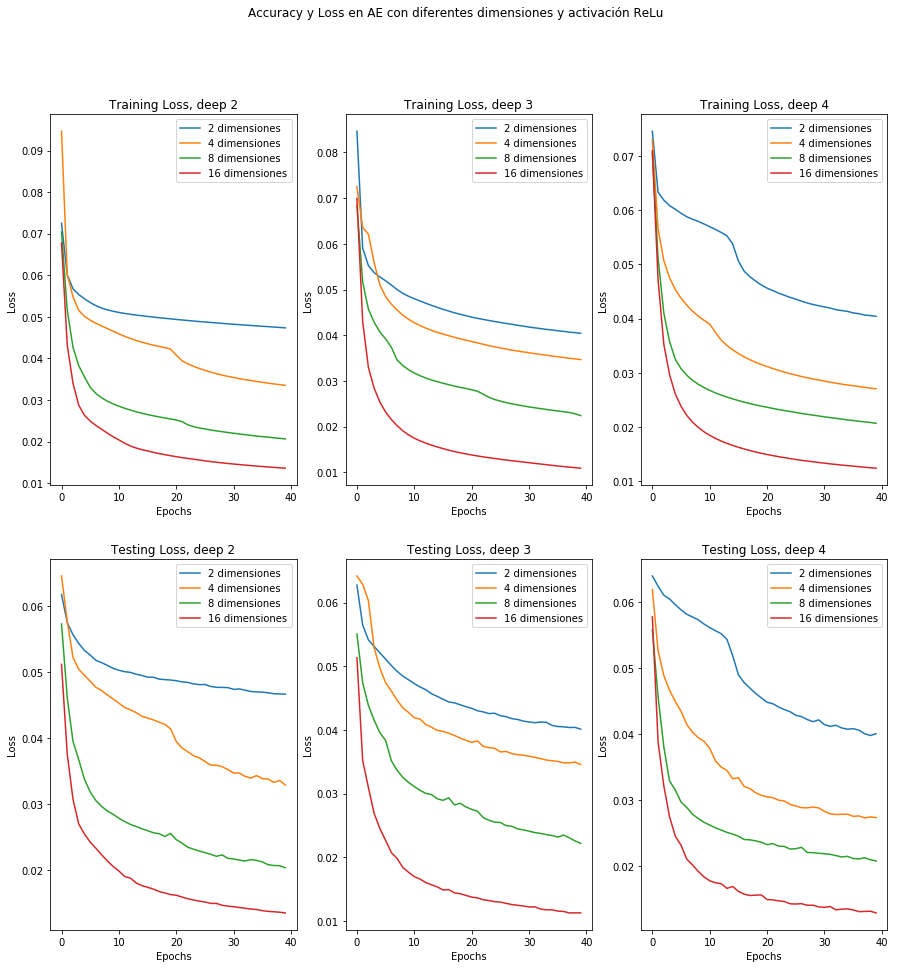

In [24]:
plot_dae(results)

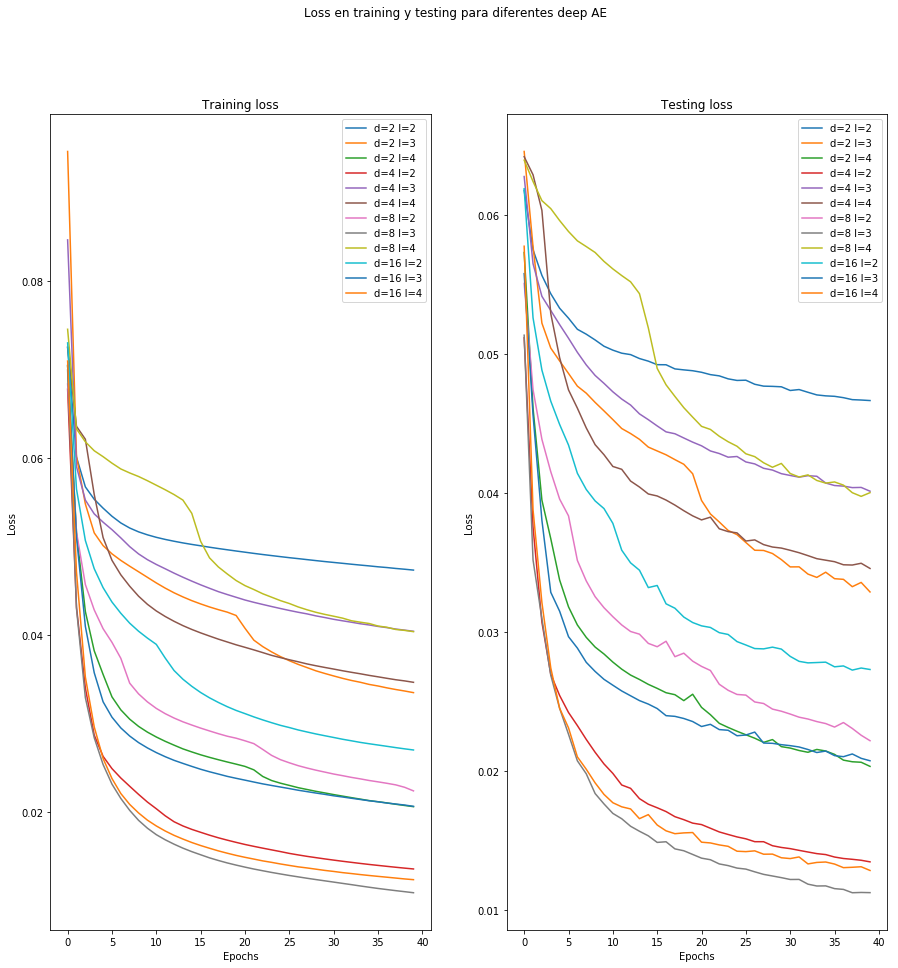

In [43]:
plot_all_dae(results)

In [47]:
dims = [2,4,8,16]
L = [2,3,4]
for deep in L:
    print("Profundidad utilizada: %d" % deep)
    for d in dims:
        print("Dimensión utilizada: %d" % d)
        #PCA
        pca = PCA(n_components=d)
        pca.fit(x_train)
        pca_train = pca.transform(x_train)
        pca_test = pca.transform(x_test)
        #AUTOENCODER
        encoder = load_model("ae_p2/my_autoencoder_768x1000x500x250x"+str(d)+"x"+str(deep)+".h5")
        #encoder = load_model("./ae_p2/basic_ae_relu_768x"+str(d)+".h5")
        encoded_train = encoder.predict(x_train)
        encoded_test = encoder.predict(x_test)
        #CLASIFICATION
        start_time = time.time()
        clf = KNeighborsClassifier(10)
        clf.fit(pca_train, y_train)
        print("-Classification Accuracy PCA %.4f" % clf.score(pca_test,y_test))
        print("--Tiempo:{:.4f}".format(time.time()-start_time))
        start_time = time.time()
        clf = KNeighborsClassifier(10)
        clf.fit(encoded_train, y_train)
        print("-Classification Accuracy %.4f" % clf.score(encoded_test,y_test))
        print("--Tiempo:{:.4f}\n".format(time.time()-start_time))

Profundidad utilizada: 2
Dimensión utilizada: 2
-Classification Accuracy PCA 0.4425
--Tiempo:0.0782
-Classification Accuracy 0.6191
--Tiempo:10.2833

Dimensión utilizada: 4
-Classification Accuracy PCA 0.6484
--Tiempo:0.1686
-Classification Accuracy 0.8185
--Tiempo:36.2051

Dimensión utilizada: 8
-Classification Accuracy PCA 0.9029
--Tiempo:0.9559
-Classification Accuracy 0.9247
--Tiempo:263.2680

Dimensión utilizada: 16
-Classification Accuracy PCA 0.9615
--Tiempo:7.6832
-Classification Accuracy 0.9573
--Tiempo:515.5434

Profundidad utilizada: 3
Dimensión utilizada: 2
-Classification Accuracy PCA 0.4425
--Tiempo:0.0909
-Classification Accuracy 0.7070
--Tiempo:11.0599

Dimensión utilizada: 4
-Classification Accuracy PCA 0.6483
--Tiempo:0.1641
-Classification Accuracy 0.7941
--Tiempo:25.5294

Dimensión utilizada: 8
-Classification Accuracy PCA 0.9030
--Tiempo:1.0372
-Classification Accuracy 0.9288
--Tiempo:210.9211

Dimensión utilizada: 16
-Classification Accuracy PCA 0.9615
--Tiempo:6.

> e) Elija algunas de las representaciones aprendidas anteriormente y visualı́celas usando la herramienta *TSNE* disponible en la librerı́a *sklearn*. Compare cualitativamente el resultado con aquel obtenido usando PCA con el mismo número de componentes

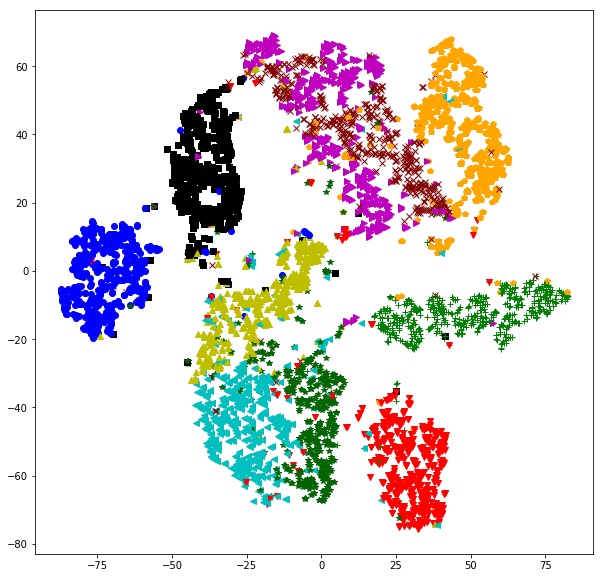

In [15]:
nplot=5000 #warning: mind your memory!
encoder = load_model("ae_p2/my_autoencoder_768x1000x500x250x8x3.h5")
encoded_train = encoder.predict(x_train[:nplot])
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)

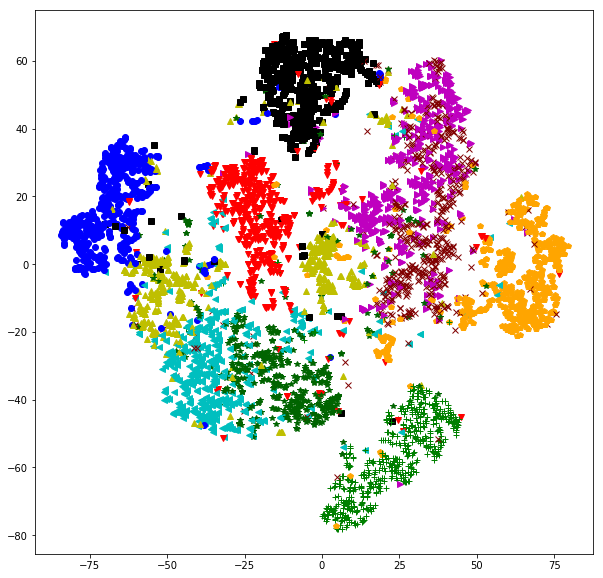

In [16]:
d = 8; l = 3
pca = PCA(n_components=d)
pca.fit(x_train)
pca_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]
pca_test = pca.transform(x_test)
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)

> f) Modifique el autoencoder construido en (a) para trabajar directamente sobre las imágenes de MNIST, sin tratarlas como vectores de 784 atributos, sino como matrices de tamaño $1\times28\times28$. Es posible lograr este objetivo utilizando capas convolucionales para definir el Encoder y el Decoder, comente como sufre las transformaciones el patrón de entrada. Compare la calidad de la representación reducida obtenida por el nuevo autoencoder con aquella obtenida anteriormente utilizando el mismo número de dimensiones. Comente.

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) #modify for th dim ordering
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [18]:
print("x_train size: {}".format(x_train.shape))
print("x_test size: {}".format(x_test.shape))
print("Y_train size: {}".format(Y_train.shape))
print("Y_test size: {}".format(Y_test.shape))

x_train size: (60000, 28, 28, 1)
x_test size: (10000, 28, 28, 1)
Y_train size: (60000, 10)
Y_test size: (10000, 10)


In [19]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 14, 14, 8)         0         
__________

/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
start_time = time.time()
hist = autoencoder.fit(x_train,x_train,epochs=40,batch_size=32,validation_split=val_ratio,verbose=0)
duration = time.time() - start_time
autoencoder.save('ae_p2/ae_f.h5')
print("Duración ae conv: {}".format(duration))

Duración ae conv: 735.756865978241


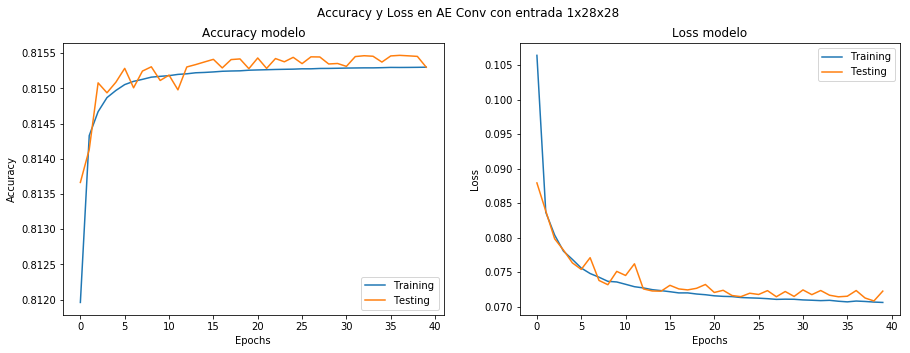

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.flatten()
ax[0].plot(hist.history["acc"], label="Training")
ax[0].plot(hist.history["val_acc"], label="Testing")
ax[1].plot(hist.history["loss"], label="Training")
ax[1].plot(hist.history["val_loss"], label="Testing")
    
ax[0].set_title('Accuracy modelo')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend()
ax[1].set_title('Loss modelo')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend()
plt.suptitle("Accuracy y Loss en AE Conv con entrada 1x28x28")
plt.show()

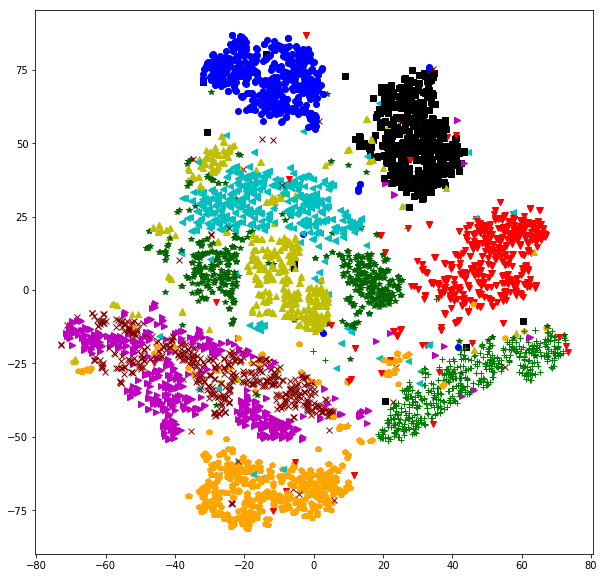

In [26]:
nplot=5000 #warning: mind your memory!
encoder = load_model("ae_p2/ae_f.h5")
encoded_train = encoder.predict(x_train[:nplot])
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(np.reshape(encoded_train,(5000,784)))
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)

### 3.2 Denoising
Como se ha discutido en clases, un denoising autoencoder (dAE) es esencialmente un autoencoder entrenado para reconstruir ejemplos parcialmente corruptos. Varios autores han demostrado que mediante esta modificación simple es posible obtener representaciones más robustas y significativas que aquellas obtenidas por un AE básico. En esta sección exploraremos la aplicación más “natural” o “directa” del método.

> a) Genere artificialmente una versión corrupta de las imágenes en MNIST utilizando el siguiente modelo de ruido (masking noise): si $x\in {\rm I\!R}^d$ es una de las imágenes originales, la versión ruidosa $\~{x}$ se obtiene como $\~{x} = x \odot \xi$ donde $\odot$ denota el producto de Hadamard (componente a componente) y $\xi \in {\rm I\!R}^d$ es un vector aleatorio binario con componentes *Ber(p)* independientes.

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255. #and x_test
x_test = x_test.astype('float32') / 255.

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [39]:
noise_level = 0.7
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask
#noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
#noisy_x_val = x_val*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask

In [36]:
def corrupt_img(noise_level):
    noise_level = 0.1
    noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
    noisy_x_train = x_train*noise_mask
    noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
    noisy_x_test = x_test*noise_mask
    return noisy_x_train, noisy_x_test

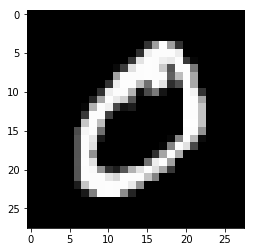

In [32]:
plt.imshow(x_train[1].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
con 0.1

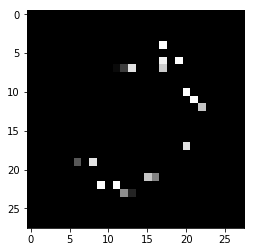

In [33]:
plt.imshow(noisy_x_train[1].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
con 0.7

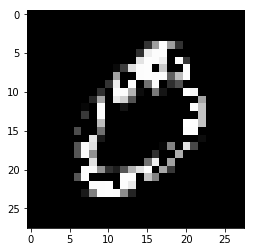

In [40]:
plt.imshow(noisy_x_train[1].reshape(28,28), cmap='gray')
plt.show()


> b) Entrene un autoencoder para reconstruir las imágenes corruptas generadas en el ı́tem anterior. Mida el error de reconstrucción y evalúe cualitativamente (visualización de la imagen corrupta y reconstruida) el resultado para un subconjunto representativo de imágenes. Experimente diferentes valores de *p* en el rango (0, 1).

In [ ]:
# DEFINE YOUR AUTOENCODER AS BEFORE
autoencoder.fit(noisy_x_train, x_train, epochs=40, batch_size=32, validation_data=(noisy_x_val, x_val))

In [ ]:
dim = 8
deep = 3
noise_level = [0.1,0.2,0.4,0.6,0.8]
results = []
for deep in L:
        print("deep AE deep:{} dim:{}".format(deep, dim))
        input_img = Input(shape=(784,))
        encoded1 = Dense(1000, activation='relu')(input_img)
        encoded2 = Dense(500, activation='relu')(encoded1)
        encoded3 = Dense(250, activation='relu')(encoded2)
        encoded4 = Dense(dim, activation='relu')(encoded3)
        decoded4 = Dense(250, activation='relu')(encoded4)
        decoded3 = Dense(500, activation='relu')(decoded4)
        decoded2 = Dense(1000, activation='relu')(decoded3)
        decoded1 = Dense(784, activation='sigmoid')(decoded2)         
        
        autoencoder = Model(input=input_img, output=decoded1)
        #encoder = Model(input=input_img, output=encoded3)
        autoencoder.compile(optimizer=SGD(lr=1.0), loss="mean_squared_error")
        start_time = time.time()
        hist = autoencoder.fit(x_train,x_train,epochs=40,batch_size=32,validation_split=val_ratio,verbose=0)
        print("-Tiempo: {:.3f}".format(time.time()-start_time))
        results.append(hist.history)
        autoencoder.save("ae_p2/my_autoencoder_768x1000x500x250x"+str(dim)+"x"+str(deep)+".h5")

> c) Utilice estas imágenes intencionalmente corruptas para entrenar un AE con fines de reducción de dimensionalidad. Durante el entrenamiento, proceda exactamente como en (b), pero su objetivo no será hacer *denoising* sino obtener una representación comprimida de alta calidad de las imágenes originales. Al final del entrenamiento, mida el error de reconstrucción como el desempeño en clasificación (vı́a kNN como en la sección anterior) de la representación obtenida. Comente.



> d) Diseñe otra manera de generar imágenes corruptas del dataset MNIST, por ejemplo algún tipo de ruido, sea creativo. Mida el error de reconstrucción y evalúe cualitativamente (visualización de la imagen corrupta y reconstruida) el resultado para un subconjunto representativo de imágenes